In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set_style("whitegrid")

In [8]:
df=pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [11]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [12]:
df.shape

(1000, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [19]:
df=df.dropna().reset_index(drop=True)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad


In [21]:
df.shape


(522, 11)

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)


In [25]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


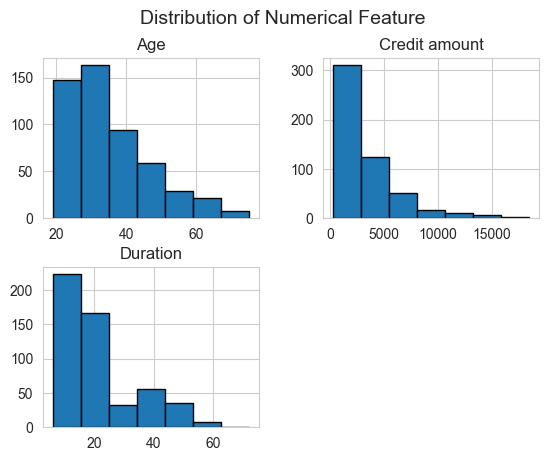

In [29]:
df[["Age","Credit amount","Duration"]].hist(bins=7,edgecolor="black")
plt.suptitle("Distribution of Numerical Feature",fontsize=14)
plt.show()

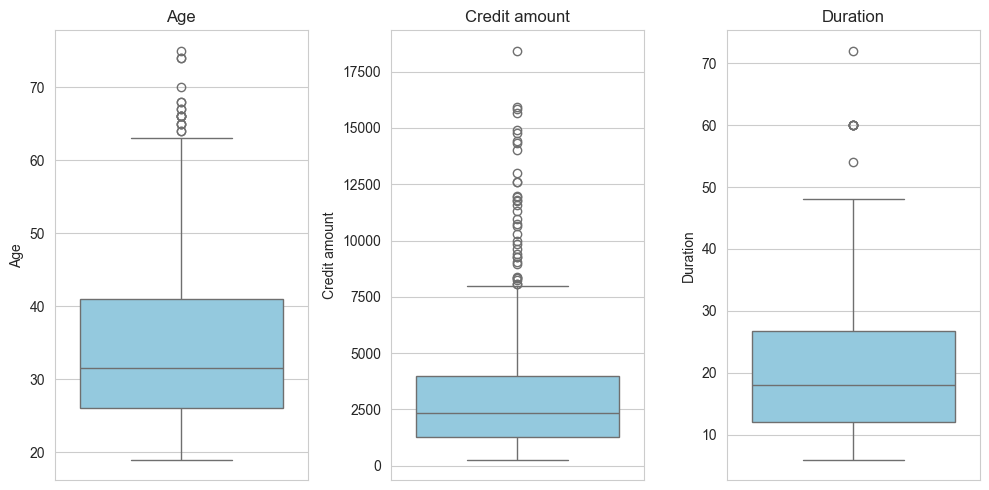

In [31]:
plt.figure(figsize=(10,5))
for i,col in enumerate(["Age","Credit amount","Duration"]):
  plt.subplot(1,3,i+1)
  sns.boxplot(y=df[col],color='skyblue')
  plt.title(col)
plt.tight_layout()
plt.show()

In [32]:
df.query("Duration>=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [57]:
categorical_cols=["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

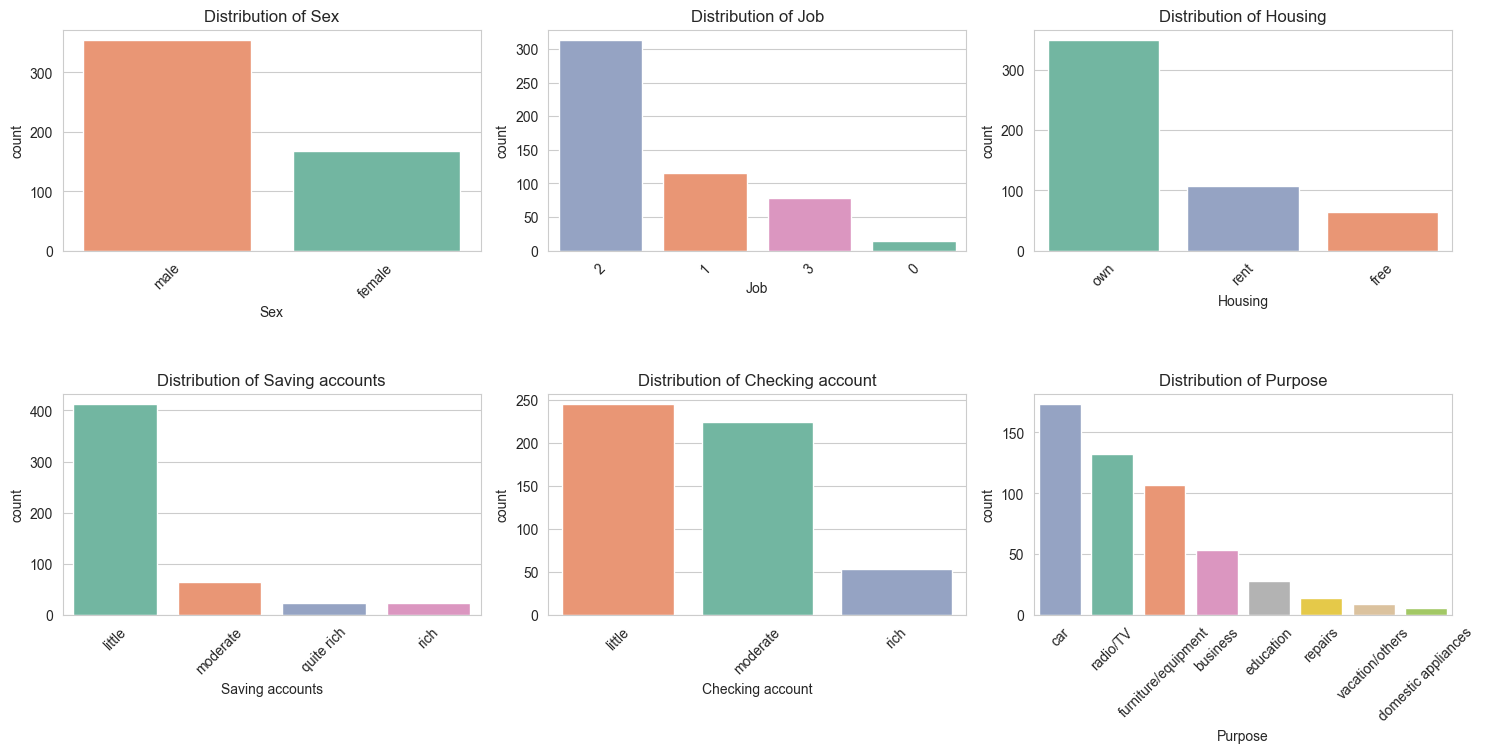

In [39]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df,x=col,palette="Set2",order=df[col].value_counts().index, hue=col, legend=False)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
corr=df[["Age","Job","Duration","Credit amount"]].corr()

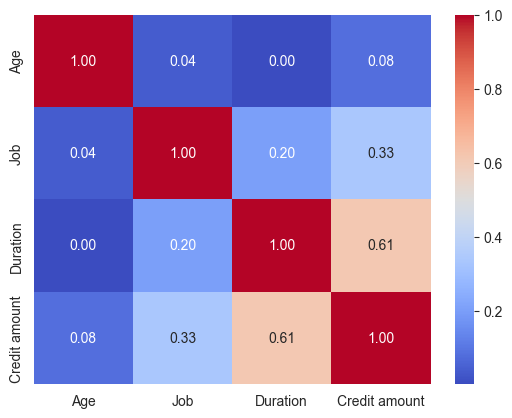

In [44]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [45]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [46]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [47]:
pd.pivot_table(df,values="Credit amount",index="Housing",columns="Purpose",aggfunc="mean")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


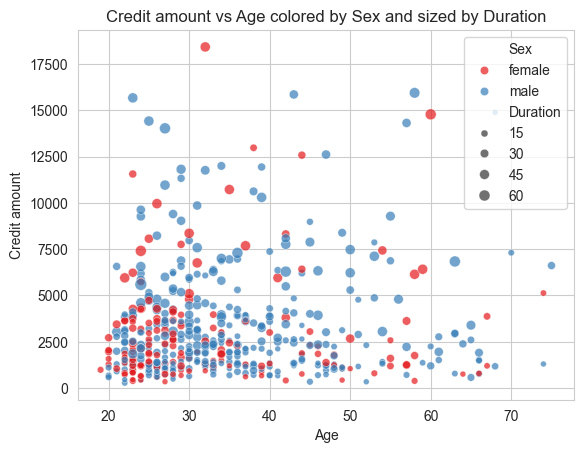

In [51]:
sns.scatterplot(data=df,x="Age",y="Credit amount",hue="Sex",size="Duration",alpha=0.7,palette="Set1"),
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

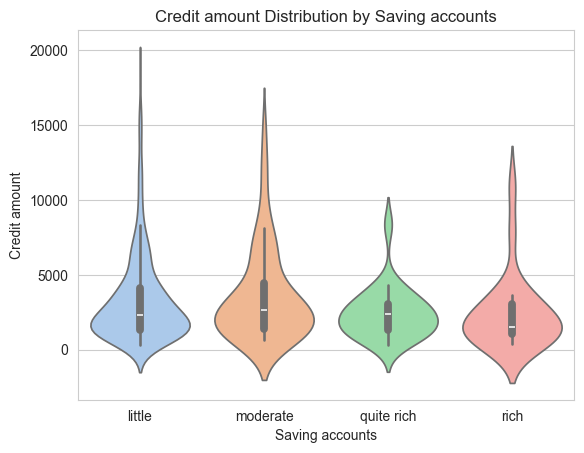

In [52]:
sns.violinplot(data=df,x="Saving accounts",y="Credit amount",palette="pastel", hue="Saving accounts", legend=False)
plt.title("Credit amount Distribution by Saving accounts")
plt.show()

In [53]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

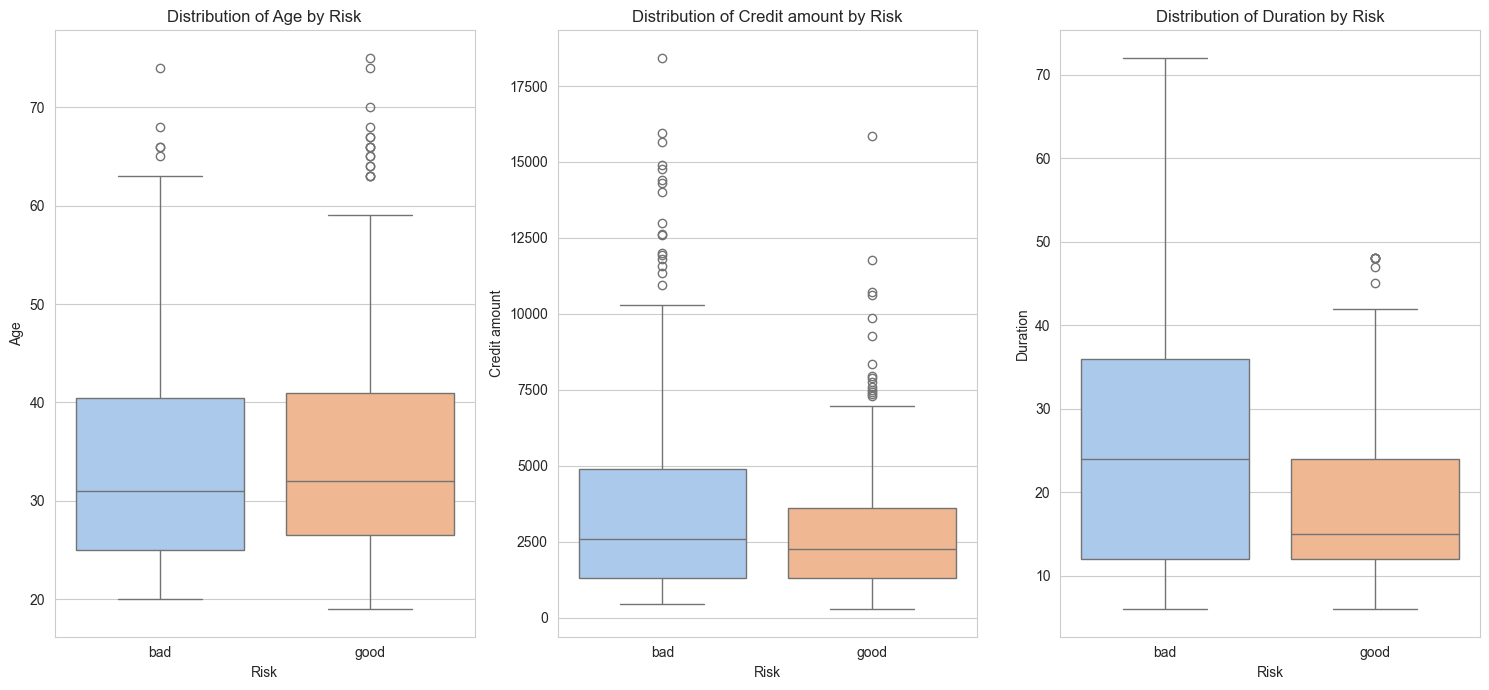

In [54]:
plt.figure(figsize=(15,7))
for i,col in enumerate(["Age","Credit amount","Duration"]):
  plt.subplot(1,3,i+1)
  sns.boxplot(data=df,x="Risk",y=col,palette="pastel", hue="Risk", legend=False)
  plt.title(f"Distribution of {col} by Risk")
plt.tight_layout()
plt.show()

In [55]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [58]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

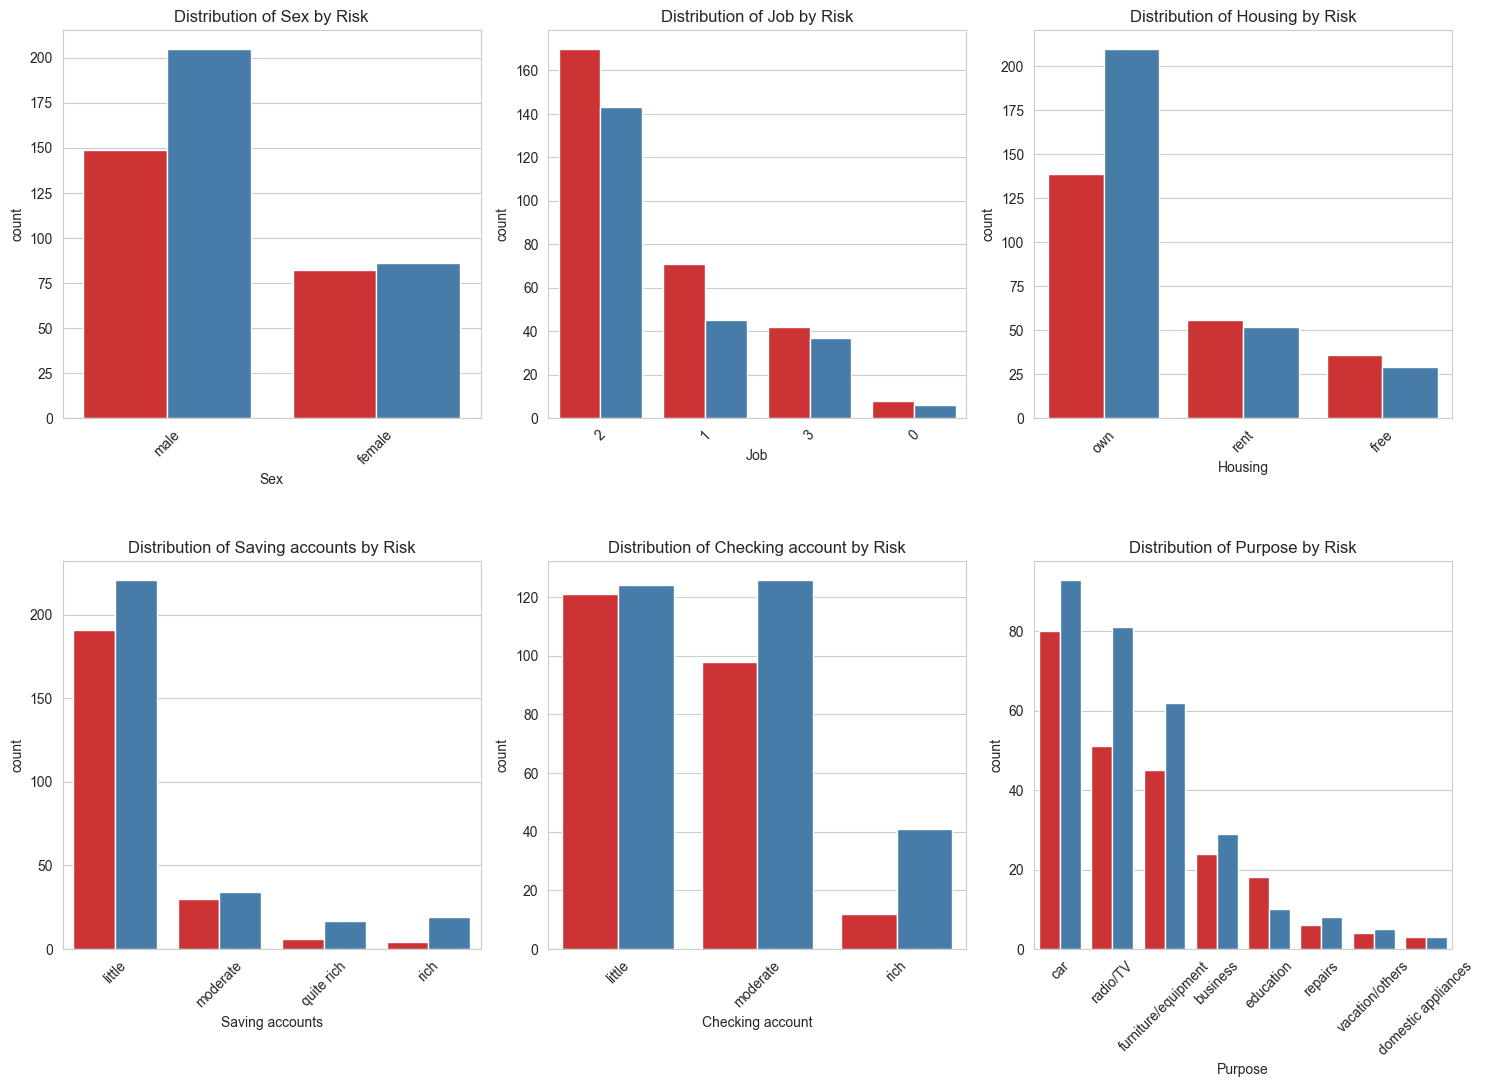

In [59]:
plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df,x=col,palette="Set1",order=df[col].value_counts().index, hue="Risk", legend=False)
  plt.title(f"Distribution of {col} by Risk")
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
features= ["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]

In [61]:
target="Risk"

In [62]:
df_model=df[features+[target]].copy()

In [63]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


In [65]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [66]:
cat_cols=df_model.select_dtypes(include="object").columns.drop("Risk")

In [67]:
le_dict={}

In [68]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [69]:
for col in cat_cols:
  le=LabelEncoder()
  df_model[col]=le.fit_transform(df_model[col])
  le_dict[col]=le
  joblib.dump(le,f"{col}_encoder.pkl")

In [70]:
le_target=LabelEncoder()

In [71]:
df_model[target]=le_target.fit_transform(df_model[target])

In [73]:
df_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [72]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [74]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [75]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,1,0,1,5951,48,5,0
1,45,1,2,0,0,0,7882,42,4,1
2,53,1,2,0,0,0,4870,24,1,0
3,35,1,3,2,0,1,6948,36,1,1
4,28,1,3,1,0,1,5234,30,1,0


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X=df_model.drop(target,axis=1)
y=df_model[target]

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [79]:
X_train.shape,X_test.shape

((417, 9), (105, 9))

In [81]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 4.2 MB/s eta 0:00:14
    --------------------------------------- 1.0/56.8 MB 3.1 MB/s eta 0:00:18
   - -------------------------------------- 2.1/56.8 MB 3.9 MB/s eta 0:00:14
   -- ------------------------------------- 3.1/56.8 MB 3.9 MB/s eta 0:00:14
   -- ------------------------------------- 4.2/56.8 MB 4.1 MB/s eta 0:00:13
   --- ------------------------------------ 5.0/56.8 MB 4.1 MB/s eta 0:00:13
   ---- ----------------------------------- 5.8/56.8 MB 4.1 MB/s eta 0:00:13
   ---- ----------------------------------- 6.6/56.8 MB 4.1 MB/s eta 0:00:13
   ----- ---------------------------------- 7.6/56.8 MB 4.1 MB/s eta 0:00:13
   ----- ---------------------------------- 8.4/56.8 MB 4.1 MB/s eta 0:00:12
   ------ --------------------------------- 9.2/56.8 MB 4.0 MB/s eta 0:00:12
   ------- -------------------------------- 10.0/56.8 MB 4.0 MB/s eta 0:00:12
   -

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [83]:
def train_model(model,X_train,y_train,X_test,y_test,param_grid):
  grid=GridSearchCV(model,param_grid,cv=5,scoring="accuracy",n_jobs=1)
  grid.fit(X_train,y_train)
  best_model=grid.best_estimator_
  y_pred=best_model.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  return best_model,acc,grid.best_params_

In [84]:
dt= DecisionTreeClassifier(random_state=1,class_weight="balanced")
dt_param_grid={
    "max_depth":[3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [85]:
best_dt,acc_dt,param_dt=train_model(dt,X_train,y_train,X_test,y_test,dt_param_grid)

In [86]:
print("Decision Tree Accuracy:",acc_dt)
print("Best Parameters:",param_dt)

Decision Tree Accuracy: 0.5904761904761905
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [88]:
rf=RandomForestClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [89]:
rf_param_grid={
    "n_estimators":[100,200,300],
    "max_depth":[3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [90]:
best_rf,acc_rf,params_rf=train_model(rf,X_train,y_train,X_test,y_test,rf_param_grid)

In [91]:
print("Random Forect Accuracy",acc_rf)
print("Best Parameters",params_rf)

Random Forect Accuracy 0.638095238095238
Best Parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [92]:
et=ExtraTreesClassifier(random_state=1,class_weight="balanced",n_jobs=-1) 

In [93]:
et_param_grid={
    "n_estimators":[100,200,300],
    "max_depth":[3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [94]:
best_et,acc_et,params_et=train_model(et,X_train,y_train,X_test,y_test,et_param_grid)

In [95]:
print("Extra Trees Accuracy",acc_et)
print("Best Parameters",params_et)

Extra Trees Accuracy 0.6190476190476191
Best Parameters {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [96]:
xgb=XGBClassifier(random_state=1,scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),use_label_encoder=False,eva_metric="logloss")

In [97]:
xgb_param_grid={
    "n_estimators":[100,200,300],
    "max_depth":[3,5,7,10,None],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1],
    "colsample_bytree":[0.5,0.7,1]
}

In [98]:
best_xgb,acc_xgb,params_xgb=train_model(xgb,X_train,y_train,X_test,y_test,xgb_param_grid)

C:\Users\91943\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eva_metric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\91943\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eva_metric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\91943\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eva_metric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\91943\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eva_metric

In [99]:
print("XGB accuracy",acc_xgb)
print("Best Parameters",params_xgb)

XGB accuracy 0.6571428571428571
Best Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [100]:
best_xgb.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [101]:
joblib.dump(best_xgb,"xgb_credit_model.pkl")

['xgb_credit_model.pkl']